In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import matplotlib.style
plt.style.use('seaborn')
import sklearn.metrics as metrics
import os
import warnings
warnings.filterwarnings("ignore")

#### Importing the dataset

In [621]:
os.chdir('C:/Users/ratee/OneDrive/Documents/PGDSBA/FRA/Project')

In [622]:
os.getcwd()

'C:\\Users\\ratee\\OneDrive\\Documents\\PGDSBA\\FRA\\Project'

In [4]:
Default = pd.read_excel('Company_Data2015-2.xlsx')

#Glimpse of Data
Default.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,23450,20 Microns,84.01,16.91,69.68,222.84,152.81,209.81,51.14,147.34,...,13.69,11.28,7.66,5.83,3.41,53,72,94.0,1.12,1.67
1,4770,21st Cent. Mgmt.,58.62,10.50,58.33,78.22,19.89,4.58,-8.85,5.44,...,-11.00,-29.19,-11.00,-8.61,-26.79,8,228,0.0,0.03,0.54
2,20650,3i Infotech,163.36,603.75,-441.86,3198.01,2518.55,2161.70,371.17,1746.42,...,66.53,63.91,35.26,35.68,33.06,540,114,0.0,0.07,0.16
3,2096,3M India,988.08,11.27,807.72,840.57,14.31,587.13,417.09,721.74,...,17.02,15.11,16.92,11.70,9.80,49,34,74.0,1.58,4.85
4,7376,52 Weeks Enter.,16.93,34.88,15.94,28.53,12.59,0.01,0.70,1.21,...,0.00,0.00,0.00,0.00,0.00,0,525,0.0,0.00,0.00


#### First, let us check the number of rows (observations) and the number of columns (variables).

In [5]:
print('The number of rows (observations) is',Default.shape[0],'\n''The number of columns (variables) is',Default.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


#### Create Dependent Variable based on Networth Next Year

In [6]:
Default['default'] = [1 if x < 0 else 0 for x in Default['Networth Next Year']]

In [7]:
Default.tail(10)

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block,default
3576,262,Zensar Tech.,956.29,44.33,770.37,785.92,3.41,301.95,541.53,675.89,...,19.88,22.36,16.69,14.05,123,10,NaN,1.23,6.05,0
3577,4284,Zim Labs.,98.43,8.00,94.25,187.26,93.00,107.50,90.50,168.25,...,7.11,5.34,5.25,2.08,119,89,69.0,1.02,2.58,0
3578,3930,Zodiac Cloth. Co,176.80,19.51,181.15,234.31,51.96,156.13,79.95,139.73,...,-4.18,-2.49,-1.72,-5.52,34,49,123.0,0.94,1.66,0
3579,23171,Zoom Exports,4.61,4.51,4.74,4.74,0.00,2.33,2.48,2.53,...,-72.22,5.56,5.56,-77.78,200,7,116.0,0.04,0.07,0
3580,6477,Zoroas. Co-op.,139.57,14.83,130.40,995.47,840.34,13.80,0.00,830.08,...,0.00,0.00,0.00,0.00,0,0,0.0,0.58,6.98,0
3581,69688,Zota Health,21.44,14.36,18.10,23.59,5.25,8.23,15.16,29.93,...,12.64,13.16,9.21,7.74,72,68,129.0,1.81,6.57,0
3582,42328,Zuari Agro Chem.,789.31,42.06,803.37,3257.25,2382.01,581.86,2186.25,3375.70,...,9.84,3.31,2.10,1.22,182,55,42.0,0.87,7.95,0
3583,621,Zuari Global,1015.90,29.44,643.62,724.05,80.00,14.96,230.01,372.46,...,0.00,0.00,0.00,0.00,217,402,0.0,0.01,2.02,0
3584,6367,Zydus Wellness,478.57,39.07,406.04,406.37,0.00,63.68,255.59,300.33,...,47.95,49.36,49.60,47.98,0,35,20.0,0.46,3.38,0
3585,24936,Zylog Systems,-854.42,29.50,-115.42,807.85,919.71,908.28,300.83,501.39,...,-33.51,-27.08,-18.16,-24.96,307,14,0.0,0.16,0.14,1


#### Data types of all variables

In [8]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [9]:
Default.duplicated().sum()

0

In [10]:
Default.drop('Co_Code', axis = 1, inplace = True)

In [11]:
Default.drop('Co_Name', axis = 1, inplace = True)

#### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [12]:
Default.describe().round(2)

,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,...,PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block,default
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00,3586.00
mean,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,1778.45,...,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88,0.11
std,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,11437.57,...,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82,0.31
min,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,-4.51,...,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00,0.00
25%,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,10.56,...,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27,0.00
50%,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,52.01,...,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53,0.00
75%,123.80,19.52,117.30,226.60,72.35,131.90,61.18,135.28,65.65,310.54,...,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91,0.00
max,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,254737.22,...,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00,1.00


#### Now, let us check the basic measures of descriptive statistics for the categorical variables.

In [13]:
Default["default"].value_counts()

0    3199
1     387
Name: default, dtype: int64

#### Checking proportion of default

In [14]:
Default.default.sum() / len(Default.default)

0.1079196876742889

In [15]:
Default['default'].describe()

count    3586.000000
mean        0.107920
std         0.310322
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default, dtype: float64

#### Check for missing values

In [16]:
Default.isnull().sum()

Networth Next Year                0
Equity Paid Up                    0
Networth                          0
Capital Employed                  0
Total Debt                        0
                               ... 
Creditors Velocity (Days)         0
Inventory Velocity (Days)       103
Value of Output/Total Assets      0
Value of Output/Gross Block       0
default                           0
Length: 66, dtype: int64

In [17]:
col=list(Default)

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

Default = pd.DataFrame(imputer.fit_transform(Default))
Default.columns=col
Default.isnull().sum()

Networth Next Year              0
Equity Paid Up                  0
Networth                        0
Capital Employed                0
Total Debt                      0
                               ..
Creditors Velocity (Days)       0
Inventory Velocity (Days)       0
Value of Output/Total Assets    0
Value of Output/Gross Block     0
default                         0
Length: 66, dtype: int64

### Correlation Heatmap

(66.5, -0.5)

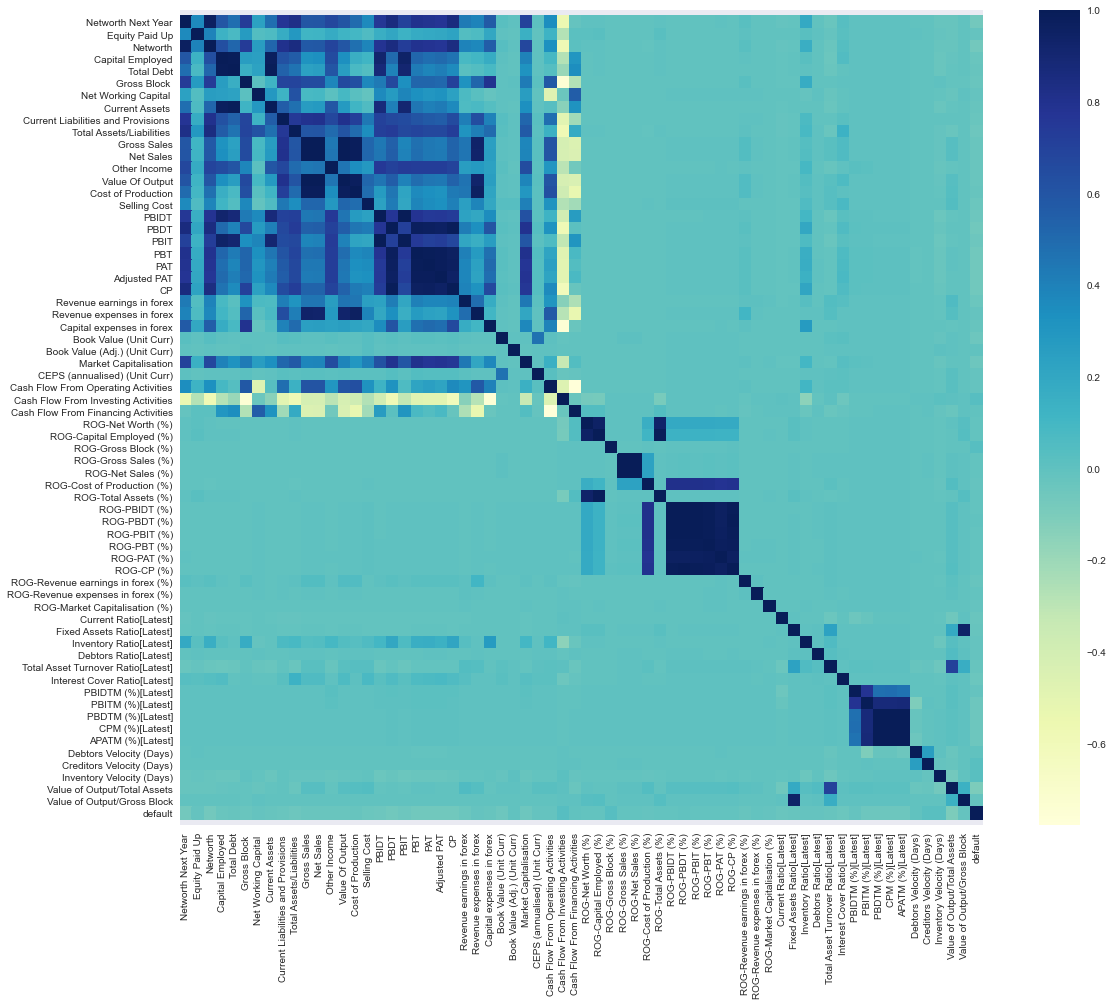

In [19]:
plt.figure(figsize=(20,15))
ax=sns.heatmap(Default.corr(),cmap='YlGnBu',square=True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)

(16.5, -0.5)

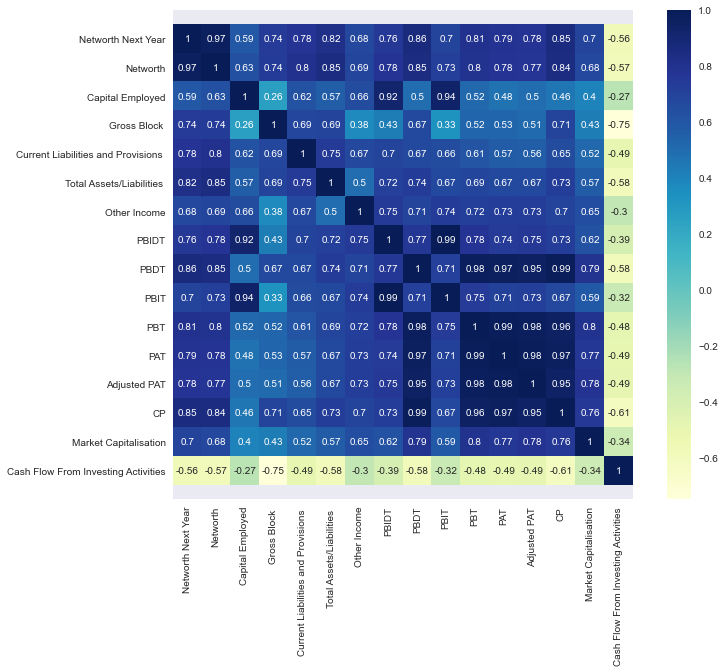

In [20]:
plt.figure(figsize=(12,9))
ax=sns.heatmap(Default[['Networth Next Year', 
                       'Networth', 
                        'Capital Employed',
                       'Gross Block ', 
                       'Current Liabilities and Provisions ', 
                       'Total Assets/Liabilities ', 
                       'Other Income',
                       'PBIDT', 
                       'PBDT',
                        'PBIT',
                        'PBT',
                        'PAT',
                       'Adjusted PAT', 
                       'CP', 
                       'Market Capitalisation', 
                       'Cash Flow From Investing Activities']].corr(), annot= True, cmap='YlGnBu',square=True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)

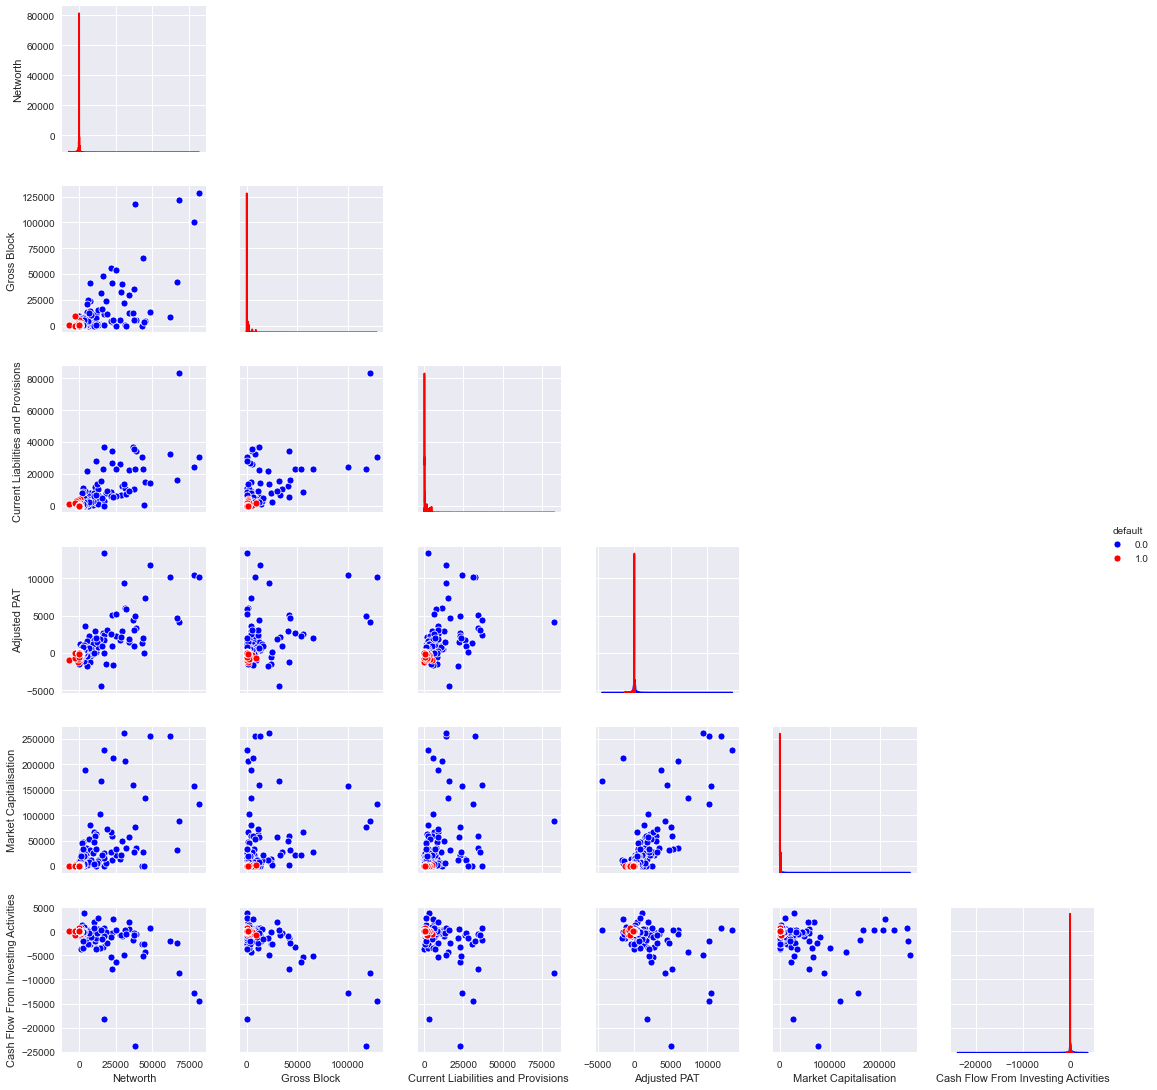

In [23]:
ax = sns.pairplot(Default[['Networth', 
                                 'Gross Block ', 
                                 'Current Liabilities and Provisions ',
                                 'Adjusted PAT', 
                                 'Market Capitalisation', 
                                 'Cash Flow From Investing Activities',
                                 'default'
                                ]],hue='default', 
                  palette=['blue','red'], diag_kind='kde')
for i, j in zip(*np.triu_indices_from(ax.axes, 1)):
    ax.axes[i, j].set_visible(False)

## Feature Selection

#### 1. 'Networth'

Text(0.5, 1.0, 'Networth to Default')

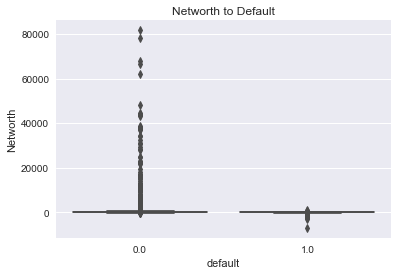

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(Default['default'], Default['Networth'])
plt.title('Networth to Default')

From the boxplot it can be infered that companies with low and negative networth are mostly defaulters

In [25]:
Default[['default', 'Networth']].groupby('default').describe()

Networth                                                           \
           count        mean          std      min    25%    50%      75%   
default                                                                     
0.0       3199.0  742.087862  4320.255012  -441.86   6.34  25.51  147.825   
1.0        387.0 -113.562894   473.147466 -7027.48 -58.78  -8.56   -1.090   

                   
              max  
default            
0.0      81657.35  
1.0        847.44

Defaulters has a mean Networth of -113.56 where as non-defaulters got a mean networth of 742.087

In [26]:
#lower_range, upper_range = check_outlier(Default['Networth'])

In [27]:
#lower_range, upper_range = check_outlier(Default['Networth'])
#Default['Networth'] = np.where(Default['Networth'] > upper_range, upper_range, Default['Networth'])
#Default['Networth'] = np.where(Default['Networth'] < lower_range, lower_range, Default['Networth'])

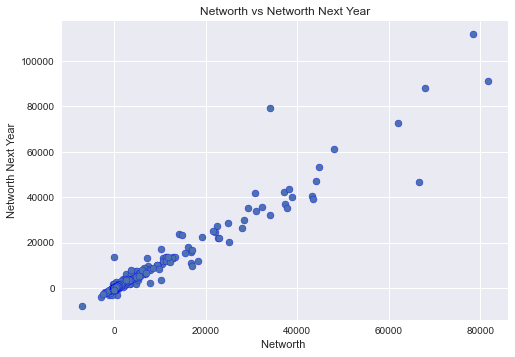

In [29]:
plt.scatter(Default['Networth'], Default['Networth Next Year'], edgecolors='b')
plt.xlabel('Networth ')
plt.ylabel('Networth Next Year')
plt.title('Networth vs Networth Next Year')
plt.show()

### 2. Gross Block (Total assets)

Text(0.5, 1.0, 'Gross Block to Default')

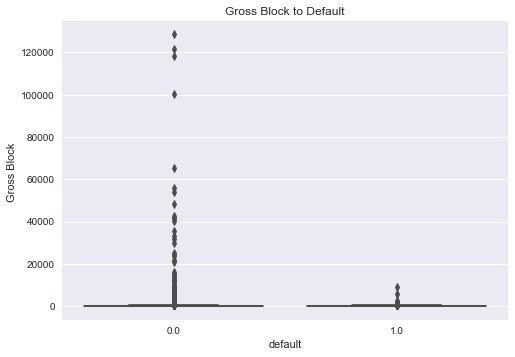

In [30]:
sns.boxplot(Default['default'], Default['Gross Block '])
plt.title('Gross Block to Default')

In [31]:
Default[['default', 'Gross Block ']].groupby('default').describe()

Gross Block                                                          \
               count        mean          std    min    25%    50%      75%   
default                                                                       
0.0           3199.0  643.676168  5150.976028 -41.19  0.555  15.04  131.305   
1.0            387.0  185.026408   634.520167  -6.08  0.710  20.92  133.680   

                    
               max  
default             
0.0      128477.59  
1.0        9070.86

In [32]:
Default[ 'Gross Block '].describe()

count      3586.000000
mean        594.178829
std        4871.547802
min         -41.190000
25%           0.570000
50%          15.870000
75%         131.895000
max      128477.590000
Name: Gross Block , dtype: float64

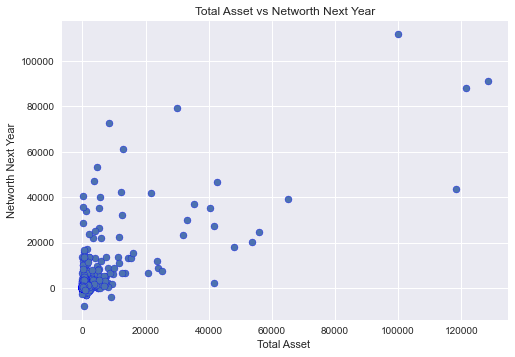

In [34]:
plt.scatter(Default['Gross Block '], Default['Networth Next Year'], edgecolors='b')
plt.xlabel('Total Asset ')
plt.ylabel('Networth Next Year')
plt.title('Total Asset vs Networth Next Year')
plt.show()

### 3. Current Liabilities and Provisions 

Text(0.5, 1.0, 'Current Liabilities and Provisions to Default')

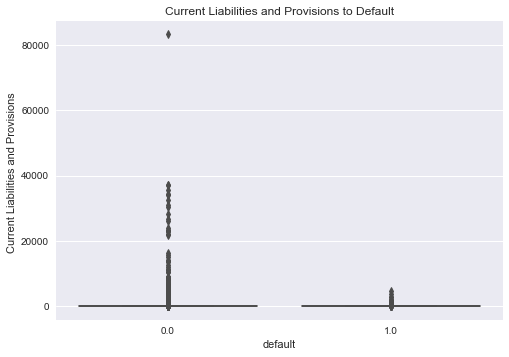

In [35]:
sns.boxplot(Default['default'], Default['Current Liabilities and Provisions '])
plt.title('Current Liabilities and Provisions to Default')

In [36]:
Default[['default', 'Current Liabilities and Provisions ']].groupby('default').describe()

Current Liabilities and Provisions                                  \
                                      count        mean          std   min   
default                                                                      
0.0                                  3199.0  423.599550  2826.548866 -0.23   
1.0                                   387.0  130.719974   435.773290  0.00   

                                        
          25%    50%     75%       max  
default                                 
0.0      0.68   9.10  65.285  83232.98  
1.0      1.11  10.28  66.945   4601.39

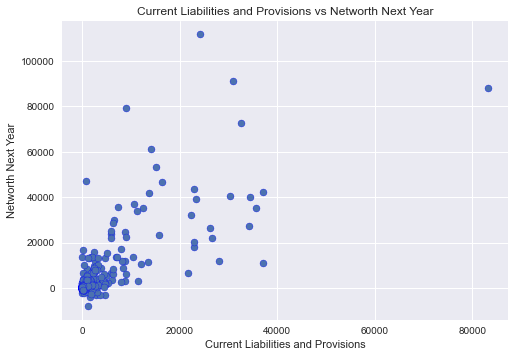

In [37]:
plt.scatter(Default['Current Liabilities and Provisions '], Default['Networth Next Year'], edgecolors='b')
plt.xlabel('Current Liabilities and Provisions')
plt.ylabel('Networth Next Year')
plt.title('Current Liabilities and Provisions vs Networth Next Year')
plt.show()

### 4. Total Assets/Liabilities 

Text(0.5, 1.0, 'Total Assets/Liabilities to Default')

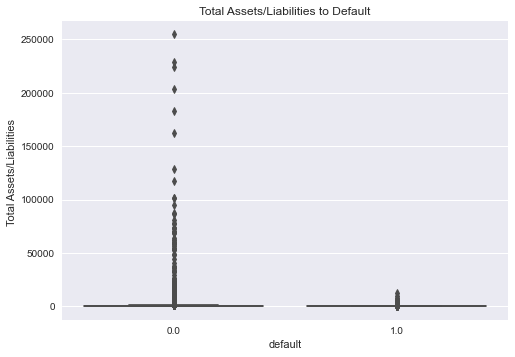

In [38]:
sns.boxplot(Default['default'], Default['Total Assets/Liabilities '])
plt.title('Total Assets/Liabilities to Default')

In [39]:
Default[['default', 'Total Assets/Liabilities ']].groupby('default').describe()

Total Assets/Liabilities                                            \
                            count         mean           std   min     25%   
default                                                                      
0.0                        3199.0  1955.334179  12091.768390  0.01  12.525   
1.0                         387.0   316.333618   1107.194397 -4.51   3.250   

                                    
           50%      75%        max  
default                             
0.0      55.68  345.285  254737.22  
1.0      20.37  142.215   12316.07

Defaulters has a mean Total Assets/Liabilities of 55.68 where as non-defaulters got a mean networth of 20.37

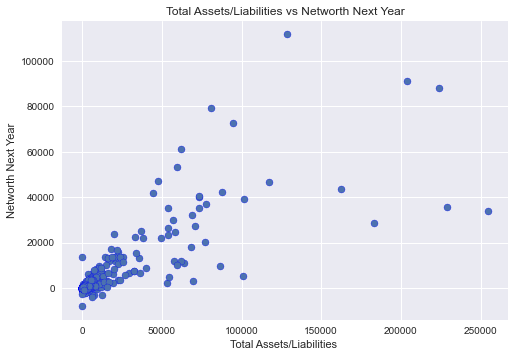

In [40]:
plt.scatter(Default['Total Assets/Liabilities '], Default['Networth Next Year'], edgecolors='b')
plt.xlabel('Total Assets/Liabilities ')
plt.ylabel('Networth Next Year')
plt.title('Total Assets/Liabilities vs Networth Next Year')
plt.show()

### 5. PBIDT

Text(0.5, 1.0, 'PBIDT to Default')

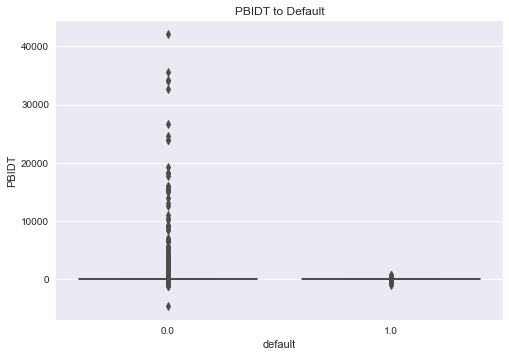

In [41]:
sns.boxplot(Default['default'], Default['PBIDT'])
plt.title('PBIDT to Default')

In [42]:
Default[['default', 'PBIDT']].groupby('default').describe()

PBIDT                                                        \
          count        mean          std      min    25%   50%    75%   
default                                                                 
0.0      3199.0  279.907058  2061.636662 -4655.14  0.120  3.00  29.38   
1.0       387.0  -14.124341    99.542555  -933.14 -4.115 -0.14   0.38   

                   
              max  
default            
0.0      42059.26  
1.0        646.46

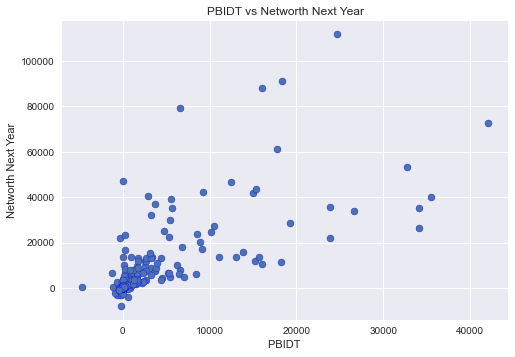

In [43]:
plt.scatter(Default['PBIDT'], Default['Networth Next Year'], edgecolors='b')
plt.xlabel('PBIDT ')
plt.ylabel('Networth Next Year')
plt.title('PBIDT vs Networth Next Year')
plt.show()

### 6. PBDT

Text(0.5, 1.0, 'PBDT to Default')

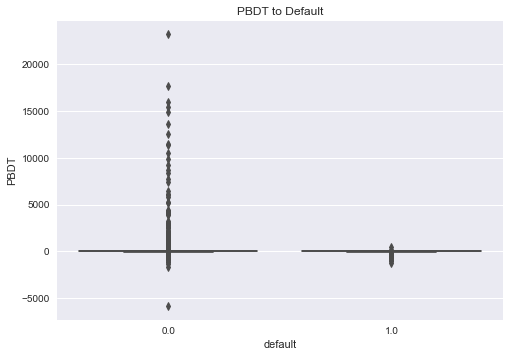

In [44]:
sns.boxplot(Default['default'], Default['PBDT'])
plt.title('PBDT to Default')

In [45]:
Default[['default', 'PBDT']].groupby('default').describe()

PBDT                                                         \
          count        mean          std      min     25%   50%    75%   
default                                                                  
0.0      3199.0  134.919244  1009.663793 -5874.53   0.050  1.38  17.48   
1.0       387.0  -37.898605   138.548738 -1204.87 -11.375 -0.61  -0.01   

                   
              max  
default            
0.0      23215.00  
1.0        455.47

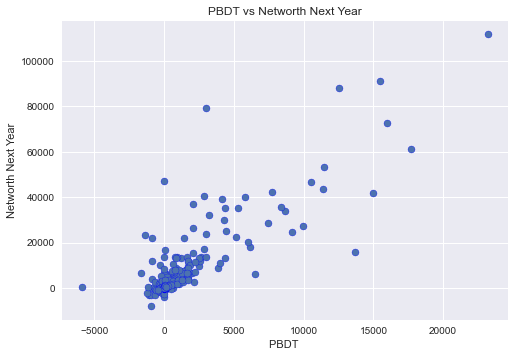

In [46]:
plt.scatter(Default['PBDT'], Default['Networth Next Year'], edgecolors='b')
plt.xlabel('PBDT ')
plt.ylabel('Networth Next Year')
plt.title('PBDT vs Networth Next Year')
plt.show()

### 7. Adjusted PAT

Text(0.5, 1.0, 'Adjusted PAT to Default')

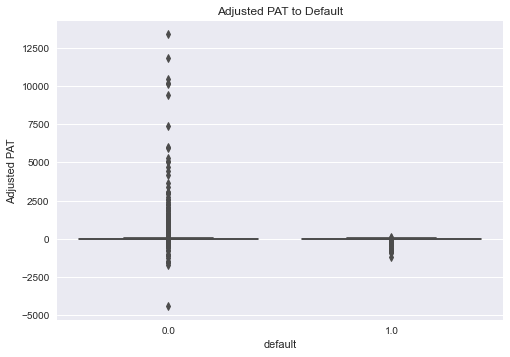

In [47]:
sns.boxplot(Default['default'], Default['Adjusted PAT'])
plt.title('Adjusted PAT to Default')

In [663]:
Default[['default', 'Adjusted PAT']].groupby('default').describe()

Adjusted PAT                                                      \
               count       mean         std      min    25%   50%    75%   
default                                                                    
0.0           3199.0  72.546196  611.544038 -4418.72   0.00  0.38  7.155   
1.0            387.0 -43.162377  136.245242 -1218.21 -16.92 -1.50 -0.090   

                   
              max  
default            
0.0      13384.11  
1.0        106.60

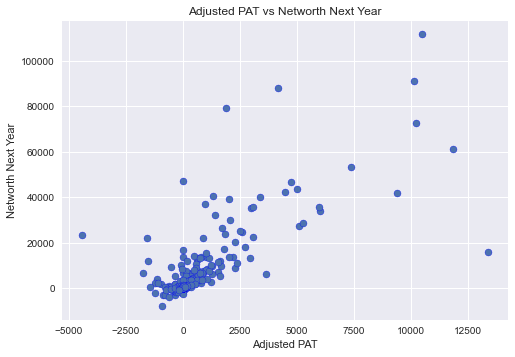

In [48]:
plt.scatter(Default['Adjusted PAT'], Default['Networth Next Year'], edgecolors='b')
plt.xlabel('Adjusted PAT')
plt.ylabel('Networth Next Year')
plt.title('Adjusted PAT vs Networth Next Year')
plt.show()

### 8.CP

Text(0.5, 1.0, 'CP to Default')

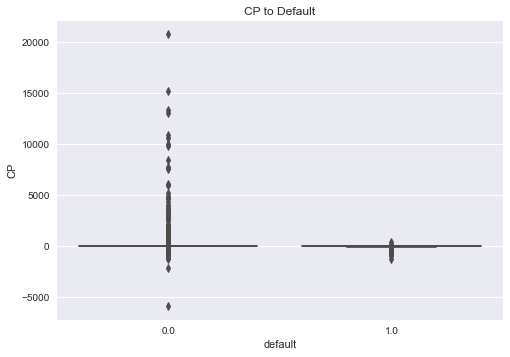

In [49]:
sns.boxplot(Default['default'], Default['CP'])
plt.title('CP to Default')

In [666]:
Default[['default', 'CP']].groupby('default').describe()

CP                                                        \
          count        mean         std      min    25%   50%     75%   
default                                                                 
0.0      3199.0  107.229712  824.082561 -5874.53   0.04  1.23  14.495   
1.0       387.0  -36.354031  130.955739 -1204.87 -11.22 -0.60   0.000   

                   
              max  
default            
0.0      20760.20  
1.0        455.47

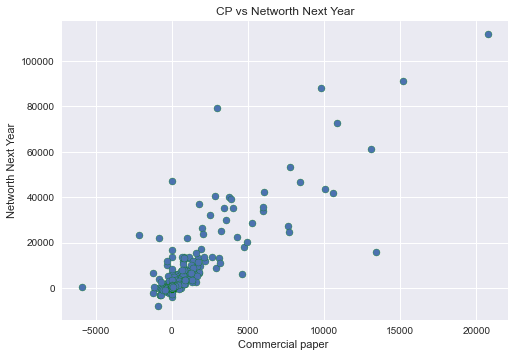

In [50]:
plt.scatter(Default['CP'], Default['Networth Next Year'], edgecolors='g')
plt.xlabel('Commercial paper ')
plt.ylabel('Networth Next Year')
plt.title('CP vs Networth Next Year')
plt.show()

###  9. Market Capitalisation

Text(0.5, 1.0, 'Market Capitalisation to Default')

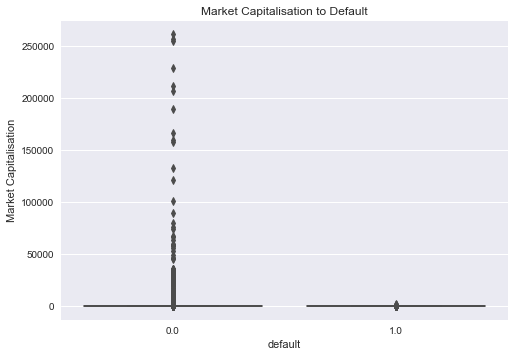

In [668]:
sns.boxplot(Default['default'], Default['Market Capitalisation'])
plt.title('Market Capitalisation to Default')

In [669]:
Default[['default', 'Market Capitalisation']].groupby('default').describe()

Market Capitalisation                                              \
                        count         mean           std  min  25%    50%   
default                                                                     
0.0                    3199.0  1859.926502  13544.576503  0.0  0.0  10.45   
1.0                     387.0    45.298243    187.617090  0.0  0.0   2.89   

                            
            75%        max  
default                     
0.0      140.56  260865.08  
1.0       13.24    2198.09

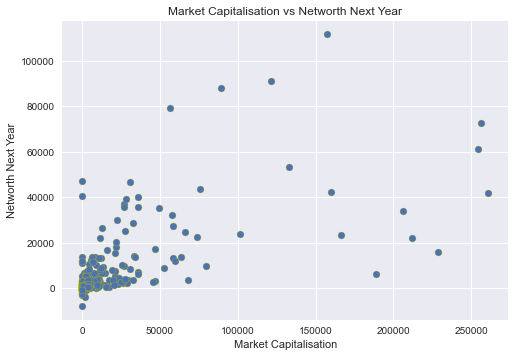

In [51]:
plt.scatter(Default['Market Capitalisation'], Default['Networth Next Year'], edgecolors='y')
plt.xlabel('Market Capitalisation')
plt.ylabel('Networth Next Year')
plt.title('Market Capitalisation vs Networth Next Year')
plt.show()

### 10. Cash Flow From Investing Activities

Text(0.5, 1.0, 'Cash Flow From Investing Activities to Default')

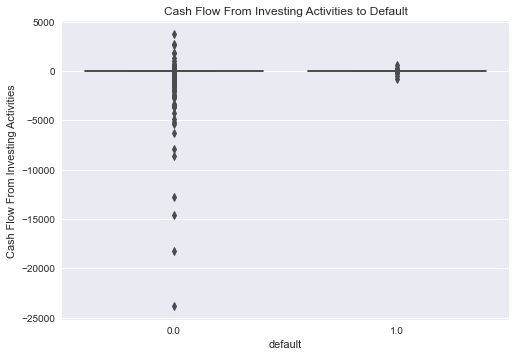

In [52]:
sns.boxplot(Default['default'], Default['Cash Flow From Investing Activities'])
plt.title('Cash Flow From Investing Activities to Default')

In [53]:
Default[['default', 'Cash Flow From Investing Activities']].groupby('default').describe()

Cash Flow From Investing Activities                                   \
                                      count       mean         std       min   
default                                                                        
0.0                                  3199.0 -68.207881  742.594086 -23843.45   
1.0                                   387.0  -0.217364   61.393801   -785.00   

                                     
          25%   50%    75%      max  
default                              
0.0     -6.53 -0.28  0.100  3732.98  
1.0     -0.06  0.00  0.335   646.58

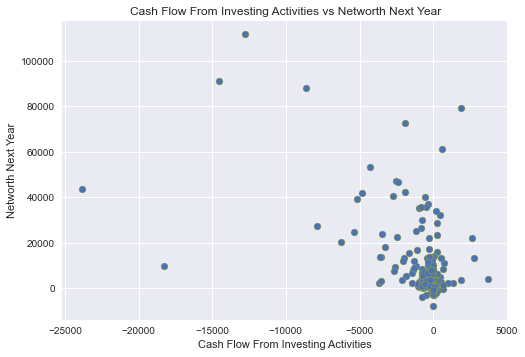

In [54]:
plt.scatter(Default['Cash Flow From Investing Activities'], Default['Networth Next Year'], edgecolors='y')
plt.xlabel('Cash Flow From Investing Activities')
plt.ylabel('Networth Next Year')
plt.title('Cash Flow From Investing Activities vs Networth Next Year')
plt.show()

### 11. PBT

Text(0.5, 1.0, 'PBT to Default')

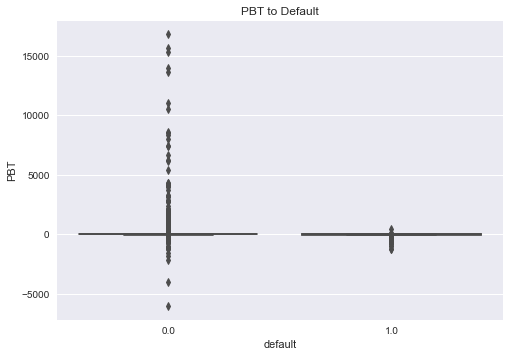

In [55]:
sns.boxplot(Default['default'], Default['PBT'])
plt.title('PBT to Default')

In [675]:
Default[['default', 'PBT']].groupby('default').describe()

PBT                                                               
          count        mean         std      min    25%   50%    75%       max
default                                                                       
0.0      3199.0  101.934195  843.750756 -6032.34   0.00  0.58  10.32  16798.00
1.0       387.0  -48.004031  156.942766 -1267.23 -18.19 -1.73  -0.07    433.97

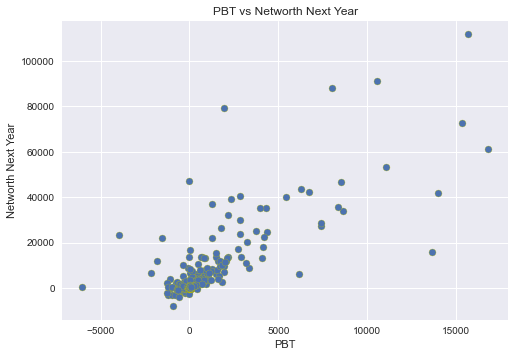

In [56]:
plt.scatter(Default['PBT'], Default['Networth Next Year'], edgecolors='y')
plt.xlabel('PBT')
plt.ylabel('Networth Next Year')
plt.title('PBT vs Networth Next Year')
plt.show()

### Outlier Treatment

In [57]:
def check_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [58]:
Default_final= Default[['Networth Next Year',
                        'Networth', 
                        'Gross Block ', 
                        'Current Liabilities and Provisions ', 
                        'Total Assets/Liabilities ',
                        'PBIDT',
                        'PBDT',
                        'PBT',
                        'Adjusted PAT',
                        'CP',
                        'Market Capitalisation',
                        'Cash Flow From Investing Activities',
                        'default'
                       ]].copy()

In [59]:
#Company_copy.drop(Company_copy[Company_copy.Networth_Next_Year > 1092.7].index, inplace=True)
lower_range, upper_range = check_outlier(Default['Networth Next Year'])
#Default_final['Networth'] = np.where(Default['Networth'] > upper_range, upper_range, Default['Networth'])
#Default_final['Networth'] = np.where(Default['Networth'] < lower_range, lower_range, Default['Networth'])
Default_final.drop(Default_final[Default_final['Networth Next Year'] > upper_range].index, inplace=True)
Default_final.drop(Default_final[Default_final['Networth Next Year'] < lower_range].index, inplace=True)

lower_range, upper_range = check_outlier(Default['Networth'])
#Default_final['Networth'] = np.where(Default['Networth'] > upper_range, upper_range, Default['Networth'])
#Default_final['Networth'] = np.where(Default['Networth'] < lower_range, lower_range, Default['Networth'])
Default_final.drop(Default_final[Default_final['Networth'] > upper_range].index, inplace=True)
Default_final.drop(Default_final[Default_final['Networth'] < lower_range].index, inplace=True)

lower_range, upper_range = check_outlier(Default['Gross Block '])
#Default_final['Gross Block '] = np.where(Default['Gross Block '] > upper_range, upper_range, Default['Gross Block '])
#Default_final['Gross Block '] = np.where(Default['Gross Block '] < lower_range, lower_range, Default['Gross Block '])
Default_final.drop(Default_final[Default_final['Gross Block '] > upper_range].index, inplace=True)
Default_final.drop(Default_final[Default_final['Gross Block '] < lower_range].index, inplace=True)

lower_range, upper_range = check_outlier(Default['Current Liabilities and Provisions '])
#Default_final['Current Liabilities and Provisions '] = np.where(Default['Current Liabilities and Provisions '] > upper_range, upper_range, Default['Current Liabilities and Provisions '])
#Default_final['Current Liabilities and Provisions '] = np.where(Default['Current Liabilities and Provisions '] < lower_range, lower_range, Default['Current Liabilities and Provisions '])
Default_final.drop(Default_final[Default_final['Current Liabilities and Provisions '] > upper_range].index, inplace=True)
Default_final.drop(Default_final[Default_final['Current Liabilities and Provisions '] < lower_range].index, inplace=True)

lower_range, upper_range = check_outlier(Default['Total Assets/Liabilities '])
#Default_final['Total Assets/Liabilities '] = np.where(Default['Total Assets/Liabilities '] > upper_range, upper_range, Default['Total Assets/Liabilities '])
#Default_final['Total Assets/Liabilities '] = np.where(Default['Total Assets/Liabilities '] < lower_range, lower_range, Default['Total Assets/Liabilities '])
Default_final.drop(Default_final[Default_final['Total Assets/Liabilities '] > upper_range].index, inplace=True)
Default_final.drop(Default_final[Default_final['Total Assets/Liabilities '] < lower_range].index, inplace=True)

lower_range, upper_range = check_outlier(Default['PBIDT'])
#Default_final['PBIDT'] = np.where(Default['PBIDT'] > upper_range, upper_range, Default['PBIDT'])
#Default_final['PBIDT'] = np.where(Default['PBIDT'] < lower_range, lower_range, Default['PBIDT'])
Default_final.drop(Default_final[Default_final['PBIDT'] > upper_range].index, inplace=True)
Default_final.drop(Default_final[Default_final['PBIDT'] < lower_range].index, inplace=True)

lower_range, upper_range = check_outlier(Default['PBDT'])
#Default_final['PBDT'] = np.where(Default['PBDT'] > upper_range, upper_range, Default['PBDT'])
#Default_final['PBDT'] = np.where(Default['PBDT'] < lower_range, lower_range, Default['PBDT'])
Default_final.drop(Default_final[Default_final['PBDT'] > upper_range].index, inplace=True)
Default_final.drop(Default_final[Default_final['PBDT'] < lower_range].index, inplace=True)

lower_range, upper_range = check_outlier(Default['PBT'])
#Default_final['PBT'] = np.where(Default['PBT'] > upper_range, upper_range, Default['PBT'])
#Default_final['PBT'] = np.where(Default['PBT'] < lower_range, lower_range, Default['PBT'])
Default_final.drop(Default_final[Default_final['PBT'] > upper_range].index, inplace=True)
Default_final.drop(Default_final[Default_final['PBT'] < lower_range].index, inplace=True)

lower_range, upper_range = check_outlier(Default['Adjusted PAT'])
#Default_final['Adjusted PAT'] = np.where(Default['Adjusted PAT'] > upper_range, upper_range, Default['Adjusted PAT'])
#Default_final['Adjusted PAT'] = np.where(Default['Adjusted PAT'] < lower_range, lower_range, Default['Adjusted PAT'])
Default_final.drop(Default_final[Default_final['Adjusted PAT'] > upper_range].index, inplace=True)
Default_final.drop(Default_final[Default_final['Adjusted PAT'] < lower_range].index, inplace=True)

lower_range, upper_range = check_outlier(Default['CP'])
#Default_final['CP'] = np.where(Default['CP'] > upper_range, upper_range, Default['CP'])
#Default_final['CP'] = np.where(Default['CP'] < lower_range, lower_range, Default['CP'])
Default_final.drop(Default_final[Default_final['CP'] > upper_range].index, inplace=True)
Default_final.drop(Default_final[Default_final['CP'] < lower_range].index, inplace=True)

lower_range, upper_range = check_outlier(Default['Market Capitalisation'])
#Default_final['Market Capitalisation'] = np.where(Default['Market Capitalisation'] > upper_range, upper_range, Default['Market Capitalisation'])
#Default_final['Market Capitalisation'] = np.where(Default['Market Capitalisation'] < lower_range, lower_range, Default['Market Capitalisation'])
Default_final.drop(Default_final[Default_final['Market Capitalisation'] > upper_range].index, inplace=True)
Default_final.drop(Default_final[Default_final['Market Capitalisation'] < lower_range].index, inplace=True)

lower_range, upper_range = check_outlier(Default['Cash Flow From Investing Activities'])
#Default_final['Cash Flow From Investing Activities'] = np.where(Default['Cash Flow From Investing Activities'] > upper_range, upper_range, Default['Cash Flow From Investing Activities'])
#Default_final['Cash Flow From Investing Activities'] = np.where(Default['Cash Flow From Investing Activities'] < lower_range, lower_range, Default['Cash Flow From Investing Activities'])
Default_final.drop(Default_final[Default_final['Cash Flow From Investing Activities'] > upper_range].index, inplace=True)
Default_final.drop(Default_final[Default_final['Cash Flow From Investing Activities'] < lower_range].index, inplace=True)


In [60]:
Default_final.head()

,Networth Next Year,Networth,Gross Block,Current Liabilities and Provisions,Total Assets/Liabilities,PBIDT,PBDT,PBT,Adjusted PAT,CP,Market Capitalisation,Cash Flow From Investing Activities,default
0,84.01,69.68,209.81,96.20,319.04,29.74,4.82,-4.63,-4.81,5.38,121.75,-3.93,0.0
4,16.93,15.94,0.01,0.52,29.05,0.99,0.99,0.99,0.80,0.80,0.00,-10.40,0.0
7,0.98,0.94,0.52,0.08,3.74,0.15,0.07,0.06,0.04,0.05,0.00,-0.52,0.0
8,0.15,0.17,0.41,0.83,2.28,0.18,0.05,0.00,0.00,0.05,0.00,-0.03,0.0
9,16.84,16.13,3.88,3.97,48.73,1.50,1.27,1.06,0.66,0.87,0.00,0.64,0.0


### Check Boxplots and scatter plots after outliers are removed

Text(0.5, 1.0, 'Networth to Default')

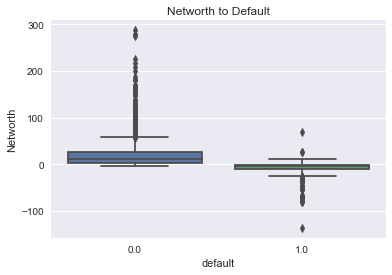

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(Default_final['default'], Default_final['Networth'])
plt.title('Networth to Default')

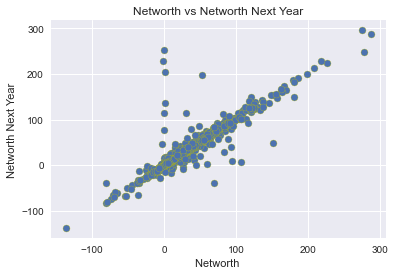

In [62]:
plt.figure(figsize=(6,4))
plt.scatter(Default_final['Networth'], Default_final['Networth Next Year'], edgecolors='y')
plt.xlabel('Networth ')
plt.ylabel('Networth Next Year')
plt.title('Networth vs Networth Next Year')
plt.show()

Text(0.5, 1.0, 'Gross Block to Default')

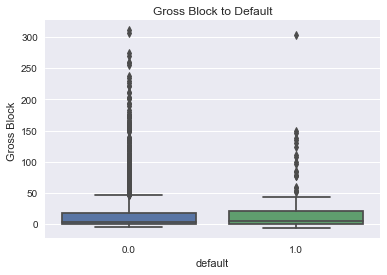

In [63]:
plt.figure(figsize=(6,4))
sns.boxplot(Default_final['default'], Default_final['Gross Block '])
plt.title('Gross Block to Default')

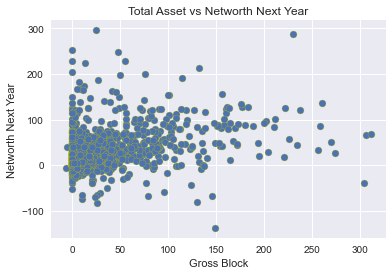

In [64]:
plt.figure(figsize=(6,4))
plt.scatter(Default_final['Gross Block '], Default_final['Networth Next Year'], edgecolors='y')
plt.xlabel('Gross Block')
plt.ylabel('Networth Next Year')
plt.title('Total Asset vs Networth Next Year')
plt.show()

Text(0.5, 1.0, 'Current Liabilities and Provisions to Default')

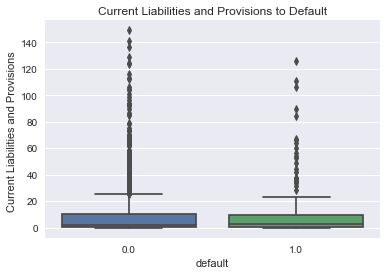

In [65]:
plt.figure(figsize=(6,4))
sns.boxplot(Default_final['default'], Default_final['Current Liabilities and Provisions '])
plt.title('Current Liabilities and Provisions to Default')

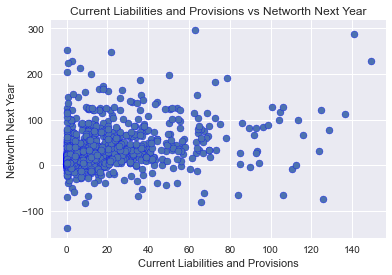

In [66]:
plt.figure(figsize=(6,4))
plt.scatter(Default_final['Current Liabilities and Provisions '], Default_final['Networth Next Year'], edgecolors='b')
plt.xlabel('Current Liabilities and Provisions')
plt.ylabel('Networth Next Year')
plt.title('Current Liabilities and Provisions vs Networth Next Year')
plt.show()

Text(0.5, 1.0, 'Total Assets/Liabilities to Default')

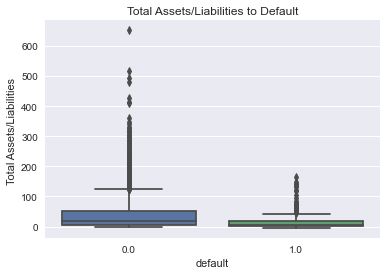

In [67]:
plt.figure(figsize=(6,4))
sns.boxplot(Default_final['default'], Default_final['Total Assets/Liabilities '])
plt.title('Total Assets/Liabilities to Default')

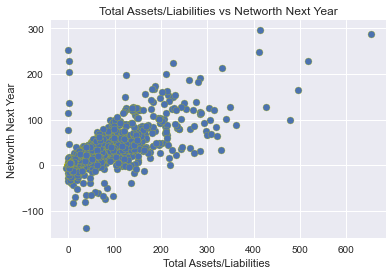

In [68]:
plt.figure(figsize=(6,4))
plt.scatter(Default_final['Total Assets/Liabilities '], Default_final['Networth Next Year'], edgecolors='y')
plt.xlabel('Total Assets/Liabilities ')
plt.ylabel('Networth Next Year')
plt.title('Total Assets/Liabilities vs Networth Next Year')
plt.show()

Text(0.5, 1.0, 'PBIDT to Default')

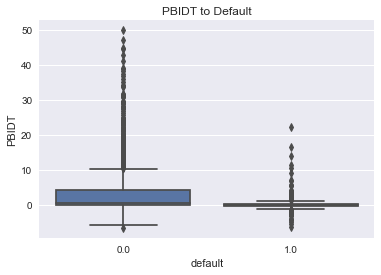

In [69]:
plt.figure(figsize=(6,4))
sns.boxplot(Default_final['default'], Default_final['PBIDT'])
plt.title('PBIDT to Default')

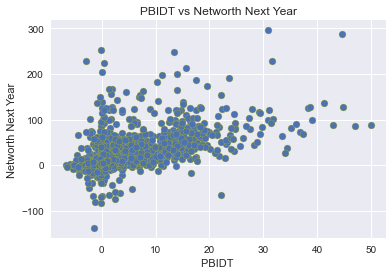

In [70]:
plt.figure(figsize=(6,4))
plt.scatter(Default_final['PBIDT'], Default_final['Networth Next Year'], edgecolors='y')
plt.xlabel('PBIDT ')
plt.ylabel('Networth Next Year')
plt.title('PBIDT vs Networth Next Year')
plt.show()

Text(0.5, 1.0, 'PBDT to Default')

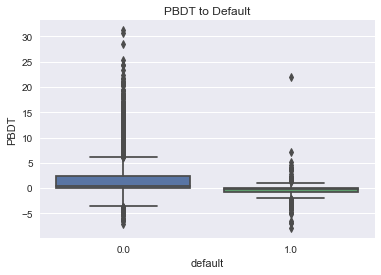

In [71]:
plt.figure(figsize=(6,4))
sns.boxplot(Default_final['default'], Default_final['PBDT'])
plt.title('PBDT to Default')

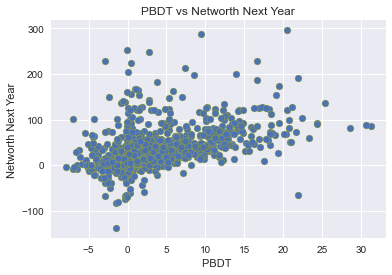

In [72]:
plt.figure(figsize=(6,4))
plt.scatter(Default_final['PBDT'], Default_final['Networth Next Year'], edgecolors='y')
plt.xlabel('PBDT ')
plt.ylabel('Networth Next Year')
plt.title('PBDT vs Networth Next Year')
plt.show()

Text(0.5, 1.0, 'Adjusted PAT to Default')

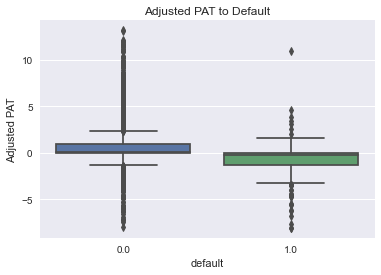

In [73]:
plt.figure(figsize=(6,4))
sns.boxplot(Default_final['default'], Default_final['Adjusted PAT'])
plt.title('Adjusted PAT to Default')

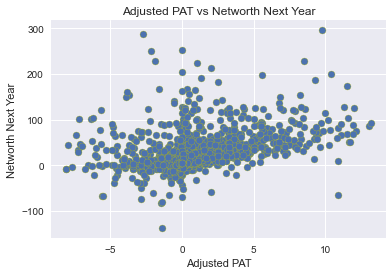

In [74]:
plt.figure(figsize=(6,4))
plt.scatter(Default_final['Adjusted PAT'], Default_final['Networth Next Year'], edgecolors='y')
plt.xlabel('Adjusted PAT')
plt.ylabel('Networth Next Year')
plt.title('Adjusted PAT vs Networth Next Year')
plt.show()

Text(0.5, 1.0, 'CP to Default')

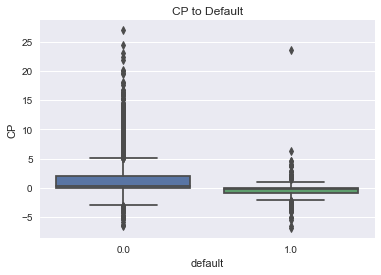

In [75]:
plt.figure(figsize=(6,4))
sns.boxplot(Default_final['default'], Default_final['CP'])
plt.title('CP to Default')

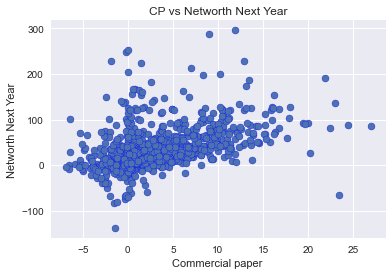

In [77]:
plt.figure(figsize=(6,4))
plt.scatter(Default_final['CP'], Default_final['Networth Next Year'], edgecolors='b')
plt.xlabel('Commercial paper ')
plt.ylabel('Networth Next Year')
plt.title('CP vs Networth Next Year')
plt.show()

Text(0.5, 1.0, 'Market Capitalisation to Default')

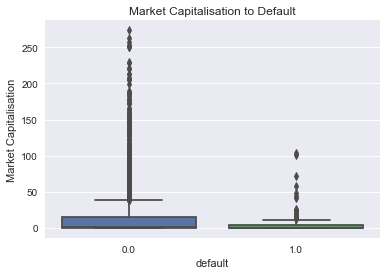

In [78]:
plt.figure(figsize=(6,4))
sns.boxplot(Default_final['default'], Default_final['Market Capitalisation'])
plt.title('Market Capitalisation to Default')

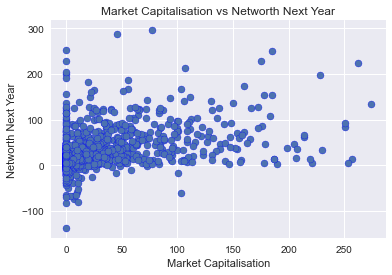

In [79]:
plt.figure(figsize=(6,4))
plt.scatter(Default_final['Market Capitalisation'], Default_final['Networth Next Year'], edgecolors='b')
plt.xlabel('Market Capitalisation')
plt.ylabel('Networth Next Year')
plt.title('Market Capitalisation vs Networth Next Year')
plt.show()

Text(0.5, 1.0, 'Cash Flow From Investing Activities to Default')

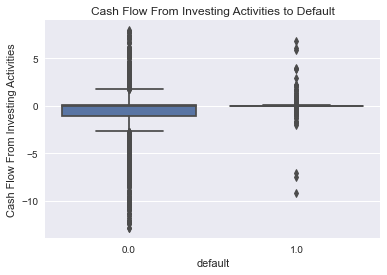

In [80]:
plt.figure(figsize=(6,4))
sns.boxplot(Default_final['default'], Default_final['Cash Flow From Investing Activities'])
plt.title('Cash Flow From Investing Activities to Default')

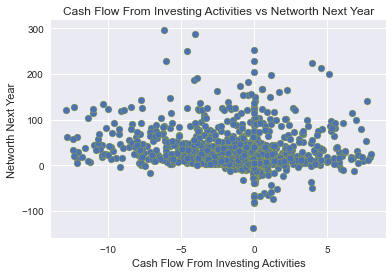

In [81]:
plt.figure(figsize=(6,4))
plt.scatter(Default_final['Cash Flow From Investing Activities'], Default_final['Networth Next Year'], edgecolors='y')
plt.xlabel('Cash Flow From Investing Activities')
plt.ylabel('Networth Next Year')
plt.title('Cash Flow From Investing Activities vs Networth Next Year')
plt.show()

Text(0.5, 1.0, 'PBT to Default')

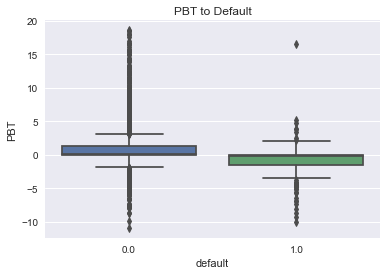

In [82]:
plt.figure(figsize=(6,4))
sns.boxplot(Default_final['default'], Default_final['PBT'])
plt.title('PBT to Default')

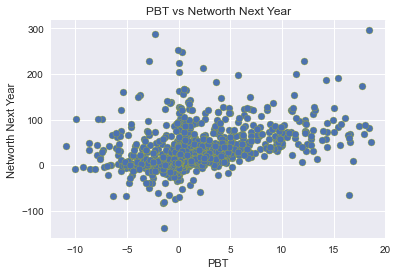

In [83]:
plt.figure(figsize=(6,4))
plt.scatter(Default_final['PBT'], Default_final['Networth Next Year'], edgecolors='y')
plt.xlabel('PBT')
plt.ylabel('Networth Next Year')
plt.title('PBT vs Networth Next Year')
plt.show()

In [84]:
print('The number of rows (observations) is',Default_final.shape[0],'\n''The number of columns (variables) is',Default_final.shape[1])

The number of rows (observations) is 2265 
The number of columns (variables) is 13


In [85]:
Default_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2265 entries, 0 to 3581
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Networth Next Year                   2265 non-null   float64
 1   Networth                             2265 non-null   float64
 2   Gross Block                          2265 non-null   float64
 3   Current Liabilities and Provisions   2265 non-null   float64
 4   Total Assets/Liabilities             2265 non-null   float64
 5   PBIDT                                2265 non-null   float64
 6   PBDT                                 2265 non-null   float64
 7   PBT                                  2265 non-null   float64
 8   Adjusted PAT                         2265 non-null   float64
 9   CP                                   2265 non-null   float64
 10  Market Capitalisation                2265 non-null   float64
 11  Cash Flow From Investing Activ

(12.5, -0.5)

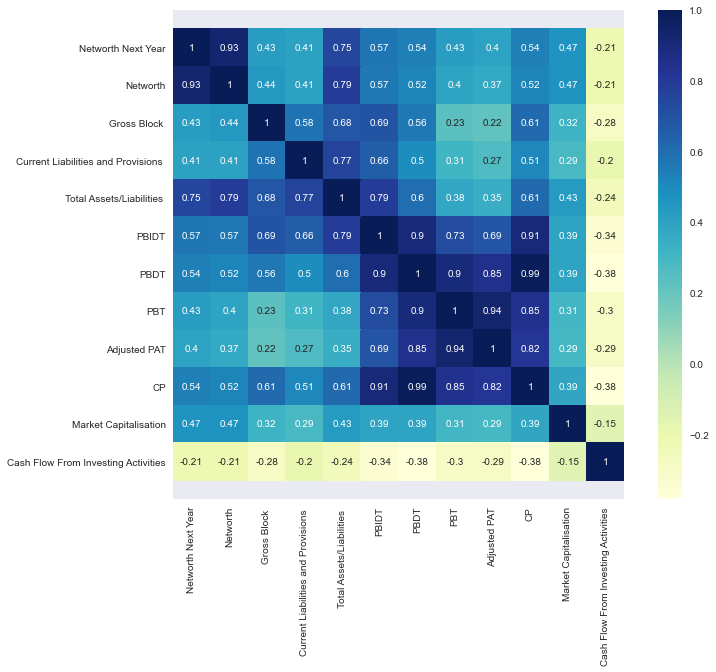

In [86]:
plt.figure(figsize=(12,9))
ax=sns.heatmap(Default_final[['Networth Next Year', 
                       'Networth', 
                        #'Capital Employed',
                       'Gross Block ', 
                       'Current Liabilities and Provisions ', 
                       'Total Assets/Liabilities ', 
                       #'Other Income',
                       'PBIDT', 
                       'PBDT',
                        #'PBIT',
                        'PBT',
                        #'PAT',
                       'Adjusted PAT', 
                       'CP', 
                       'Market Capitalisation', 
                       'Cash Flow From Investing Activities']].corr(), annot= True, cmap='YlGnBu',square=True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)

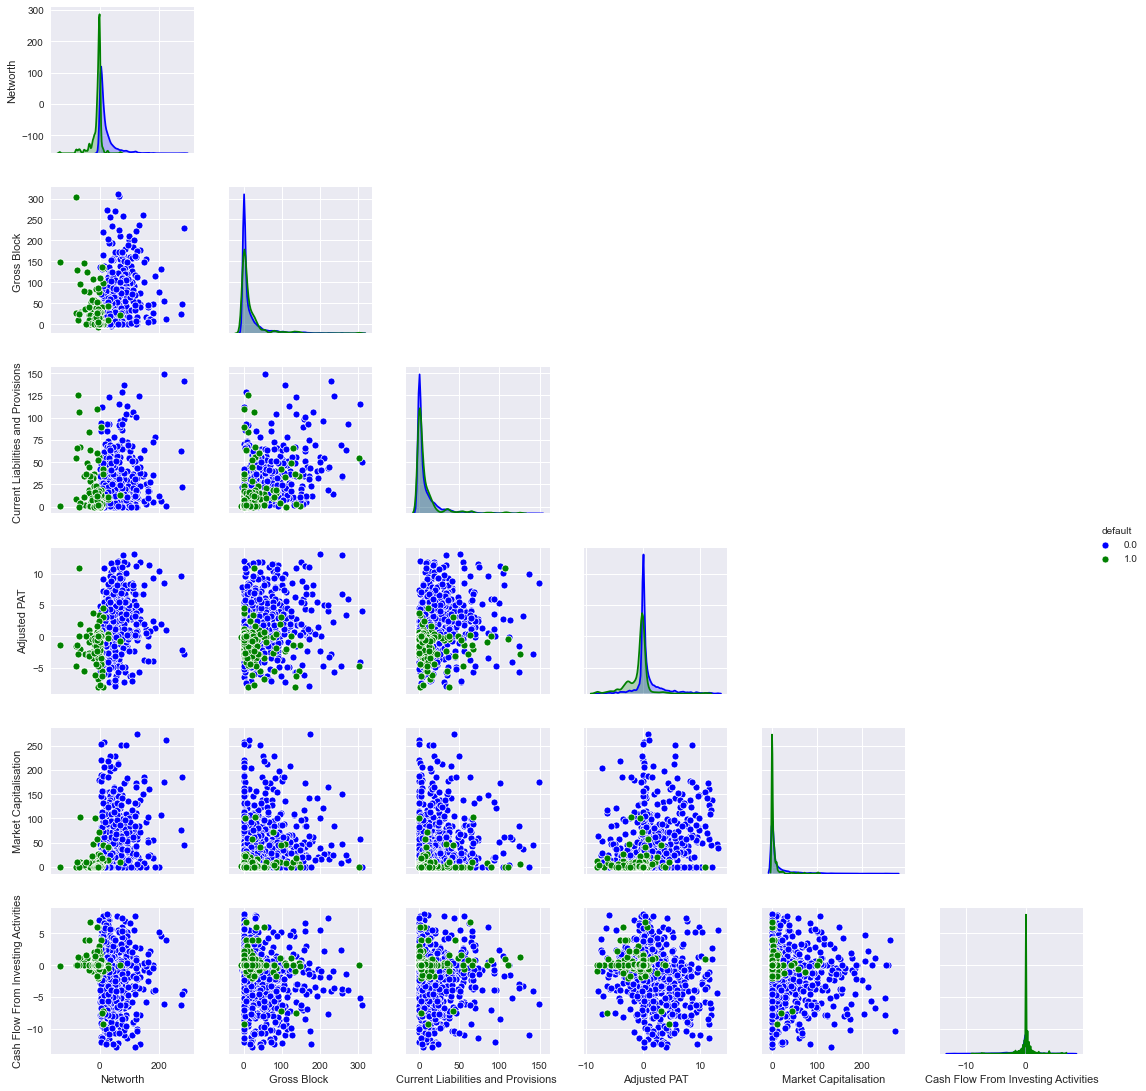

In [88]:
ax = sns.pairplot(Default_final[['Networth', 
                                 'Gross Block ', 
                                 'Current Liabilities and Provisions ',
                                 'Adjusted PAT', 
                                 'Market Capitalisation', 
                                 'Cash Flow From Investing Activities',
                                 'default'
                                ]],hue='default', 
                  palette=['blue','green'], diag_kind='kde')
for i, j in zip(*np.triu_indices_from(ax.axes, 1)):
    ax.axes[i, j].set_visible(False)

In [89]:
Default_final = Default_final.drop('Networth Next Year', axis = 1)

### Checking Variance Inflation Factor

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [91]:
X = Default_final.drop('default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,PBDT,137.647577
8,CP,71.280908
6,PBT,29.929277
3,Total Assets/Liabilities,20.837640
4,PBIDT,20.430973
7,Adjusted PAT,10.573843
0,Networth,6.829083
1,Gross Block,5.328235
2,Current Liabilities and Provisions,4.360114
9,Market Capitalisation,1.602781


In [92]:
X = X.drop('PBDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,Total Assets/Liabilities,20.519380
7,CP,18.791558
4,PBIDT,18.300577
5,PBT,13.421119
6,Adjusted PAT,9.575950
0,Networth,6.708015
1,Gross Block,4.948040
2,Current Liabilities and Provisions,4.360107
8,Market Capitalisation,1.593280
9,Cash Flow From Investing Activities,1.251415


In [93]:
X = X.drop('Total Assets/Liabilities ', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,CP,16.759682
4,PBT,13.182398
3,PBIDT,11.089924
5,Adjusted PAT,9.562995
1,Gross Block,4.825262
2,Current Liabilities and Provisions,2.531721
0,Networth,2.119895
7,Market Capitalisation,1.591473
8,Cash Flow From Investing Activities,1.251017


In [94]:
X = X.drop('CP', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,PBT,11.101771
3,PBIDT,9.134823
5,Adjusted PAT,9.060529
1,Gross Block,3.582123
2,Current Liabilities and Provisions,2.507615
0,Networth,2.119869
6,Market Capitalisation,1.589909
7,Cash Flow From Investing Activities,1.235845


In [95]:
X = X.drop('PBT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,PBIDT,7.879959
1,Gross Block,3.288652
4,Adjusted PAT,2.961152
2,Current Liabilities and Provisions,2.504329
0,Networth,2.118308
5,Market Capitalisation,1.587829
6,Cash Flow From Investing Activities,1.230013


In [96]:
X = X.drop('PBIDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,Gross Block,2.123280
0,Networth,2.023580
2,Current Liabilities and Provisions,1.995199
4,Market Capitalisation,1.587772
3,Adjusted PAT,1.346585
5,Cash Flow From Investing Activities,1.228342


### Preparing Final Dataset

In [97]:
Default_final.columns

Index(['Networth', 'Gross Block ', 'Current Liabilities and Provisions ',
       'Total Assets/Liabilities ', 'PBIDT', 'PBDT', 'PBT', 'Adjusted PAT',
       'CP', 'Market Capitalisation', 'Cash Flow From Investing Activities',
       'default'],
      dtype='object')

In [98]:
Default_final.columns = ['Networth', 'Gross_Block', 'Current_Liabilities_and_Provisions',
       'Total_Assets_Liabilities', 'PBIDT', 'PBDT', 'PBT', 'Adjusted_PAT',
       'CP', 'Market_Capitalisation', 'Cash_Flow_From_Investing_Activities',
       'default']

In [99]:
Default_final.default = Default_final.default.astype(int)

In [100]:
Default_final.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Networth,2265.0,18.08,31.24,-136.20,2.68,8.09,22.91,287.05
Gross_Block,2265.0,18.37,37.09,-6.08,0.08,2.75,18.96,310.76
Current_Liabilities_and_Provisions,2265.0,9.23,17.40,-0.23,0.17,2.11,10.28,149.04
Total_Assets_Liabilities,2265.0,41.41,60.97,-4.51,5.30,17.86,50.58,652.39
PBIDT,2265.0,3.20,6.30,-6.55,0.01,0.49,3.71,49.83
PBDT,2265.0,1.87,4.23,-7.88,0.00,0.27,2.13,31.22
PBT,2265.0,0.94,3.22,-10.89,-0.03,0.10,1.08,18.58
Adjusted_PAT,2265.0,0.60,2.38,-8.08,-0.05,0.07,0.75,13.15
CP,2265.0,1.56,3.52,-6.84,0.00,0.24,1.80,26.93
Market_Capitalisation,2265.0,15.83,34.99,0.00,0.00,1.43,13.22,273.51


In [101]:
Default_final.default.value_counts()

0    2033
1     232
Name: default, dtype: int64

In [102]:
Default_final.default.sum() / len(Default_final.default)

0.10242825607064018

### Train & Test Data Split

In [103]:
from sklearn.model_selection import train_test_split
X = Default_final.drop('default', axis = 1)
y = Default_final['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

## Model 1: Logit Regression

In [104]:
import statsmodels.formula.api as SM

In [105]:
f_1 = 'default ~ Gross_Block + Networth + Current_Liabilities_and_Provisions + Market_Capitalisation + Adjusted_PAT + Cash_Flow_From_Investing_Activities'

#### Fitting the logistic regression model on 'Default' dataset

In [106]:
model_1 = SM.logit(formula = f_1, data=Default_final).fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.125986
         Iterations: 30
         Function evaluations: 35
         Gradient evaluations: 35


#### Checking the parameters

In [107]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2265
Model:                          Logit   Df Residuals:                     2258
Method:                           MLE   Df Model:                            6
Date:                Wed, 23 Dec 2020   Pseudo R-squ.:                  0.6187
Time:                        11:07:50   Log-Likelihood:                -285.36
converged:                       True   LL-Null:                       -748.32
Covariance Type:            nonrobust   LLR p-value:                9.301e-197
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.2832      0.122    -10.477      0.000      -1.523      -1.043
Gross_Block                             0.0293      0.008      3.850      0.000       0.014       0.044
Networth                               -0.5662      0.045    -12.597      0.000      -0.654      -0.478
Current_Liabilities_and_Provisions      0.0172      0.012      1.430      0.153      -0.006       0.041
Market_Capitalisation                  -0.0049      0.008     -0.602      0.547      -0.021       0.011
Adjusted_PAT                           -0.3657      0.099     -3.710      0.000      -0.559      -0.173
Cash_Flow_From_Investing_Activities     0.0043      0.084      0.051      0.959      -0.160       0.168
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.37 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [108]:
f_2 = 'default ~ Gross_Block + Networth + Adjusted_PAT'

In [109]:
model_2 = SM.logit(formula = f_2, data=Default_final).fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.126484
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27


In [110]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2265
Model:                          Logit   Df Residuals:                     2261
Method:                           MLE   Df Model:                            3
Date:                Wed, 23 Dec 2020   Pseudo R-squ.:                  0.6172
Time:                        11:07:57   Log-Likelihood:                -286.49
converged:                       True   LL-Null:                       -748.32
Covariance Type:            nonrobust   LLR p-value:                6.484e-200
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.2636      0.118    -10.668      0.000      -1.496      -1.031
Gross_Block      0.0316      0.007      4.721      0.000       0.018       0.045
Networth        -0.5642      0.045    -12.676      0.000      -0.651      -0.477
Adjusted_PAT    -0.3675      0.098     -3.751      0.000      -0.559      -0.175
================================================================================

Possibly complete quasi-separation: A fraction 0.37 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Performance Measurement

In [111]:
y_prob_pred_train = model_2.predict(Default_train)

Plot actual default Vs Predicted

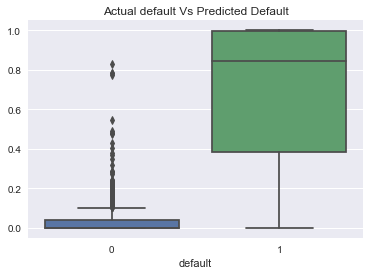

In [112]:
plt.figure(figsize=(6,4))
sns.boxplot(x=Default_final['default'],y=y_prob_pred_train)
plt.title('Actual default Vs Predicted Default')
plt.show()

In [113]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [114]:
from sklearn import metrics
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, [0,1]) 
    #cm = metrics.confusion_matrix(actual, predicted)
    plt.subplots(figsize=(4,3))
    ax = sns.heatmap(cm, cmap = 'Paired', annot=True, fmt='.0f',annot_kws={"fontsize":12}, cbar = False)
    bottom, top = ax.get_ylim()
    ax.set_ylim (bottom + 0.5, top - 0.5)
    plt.yticks(rotation=0)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

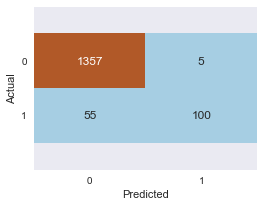

In [115]:
draw_cm(Default_train['default'], y_class_pred)

#sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g',cmap='Blues');

In [116]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.961     0.996     0.978      1362
           1      0.952     0.645     0.769       155

    accuracy                          0.960      1517
   macro avg      0.957     0.821     0.874      1517
weighted avg      0.960     0.960     0.957      1517



In [117]:
from sklearn.metrics import roc_auc_score,roc_curve

fpr, tpr, thresholds = roc_curve(Default_train['default'],y_prob_pred_train)

In [118]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.21777551772764828

In [119]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.218:
        a=1
    else:
        a=0
    y_class_pred.append(a)

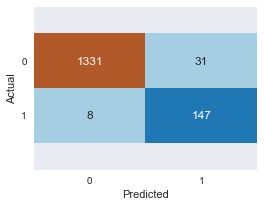

In [120]:
draw_cm(Default_train['default'], y_class_pred)

In [121]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.994     0.977     0.986      1362
           1      0.826     0.948     0.883       155

    accuracy                          0.974      1517
   macro avg      0.910     0.963     0.934      1517
weighted avg      0.977     0.974     0.975      1517



### Validating on Test Data

In [122]:
y_prob_pred_test = model_2.predict(Default_test)

In [123]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.20:
        a=1
    else:
        a=0
    y_class_pred.append(a)

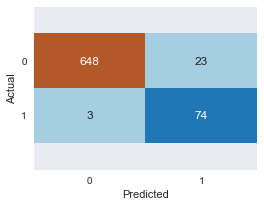

In [124]:
draw_cm(Default_test['default'], y_class_pred)

In [125]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.995     0.966     0.980       671
           1      0.763     0.961     0.851        77

    accuracy                          0.965       748
   macro avg      0.879     0.963     0.915       748
weighted avg      0.971     0.965     0.967       748



In [126]:
conf_met=metrics.classification_report(Default_test['default'],y_class_pred,digits=3,output_dict=True)
met_df=pd.DataFrame(conf_met).transpose()
logit_test_prec=round(met_df.loc["1"][0],2)
logit_test_rec=round(met_df.loc["1"][1],2)
logit_test_f1=round(met_df.loc["1"][2],2)
logit_test_accu=round(met_df.loc["accuracy"][0],2)

In [127]:
met_df

,precision,recall,f1-score,support
0,0.995392,0.965723,0.980333,671.000000
1,0.762887,0.961039,0.850575,77.000000
accuracy,0.965241,0.965241,0.965241,0.965241
macro avg,0.879139,0.963381,0.915454,748.000000
weighted avg,0.971457,0.965241,0.966975,748.000000


In [128]:
print('logit_test_prec :', logit_test_prec)
print('logit_test_rec :', logit_test_rec)
print('logit_test_f1 :', logit_test_f1)
print('logit_test_accu :', logit_test_accu)

logit_test_prec : 0.76
logit_test_rec : 0.96
logit_test_f1 : 0.85
logit_test_accu : 0.97


In [129]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict(X_data)
    #probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

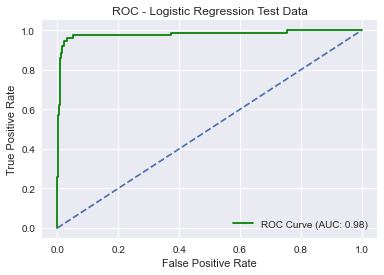

logit_test_auc 0.9800065806027057


In [130]:
logit_test_auc, logit_test_fpr, logit_test_tpr = draw_auc_roc(model_1, X_test, y_test, 'green', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc)

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [132]:
param_grid = {
    'max_depth': [ 3 ], #[ 3, 4, 5 ], 
    'max_features': [ 3 ], #[ 2, 3, 4 ],         
    'min_samples_leaf': [ 10 ], #[ 10, 15, 20 ], 
    'min_samples_split': [ 50 ], #[ 40, 50, 60 ], 
    'n_estimators': [ 175 ] #[ 150, 175, 200 ] 
}
rfcl = RandomForestClassifier(criterion='entropy')
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [133]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [3], 'max_features': [3],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [175]})

In [134]:
grid_search.best_params_

{'max_depth': 3,
 'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 175}

In [135]:
best_grid = grid_search.best_estimator_

In [136]:
ytest_predict = best_grid.predict(X_test)

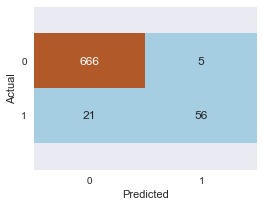

In [137]:
draw_cm(y_test,ytest_predict)

In [138]:
print(metrics.classification_report(y_test,ytest_predict,digits=3))

              precision    recall  f1-score   support

           0      0.969     0.993     0.981       671
           1      0.918     0.727     0.812        77

    accuracy                          0.965       748
   macro avg      0.944     0.860     0.896       748
weighted avg      0.964     0.965     0.963       748



In [139]:
conf_met=metrics.classification_report(y_test,ytest_predict,digits=3,output_dict=True)
met_df=pd.DataFrame(conf_met).transpose()
rfl_test_prec=round(met_df.loc["1"][0],2)
rfl_test_rec=round(met_df.loc["1"][1],2)
rfl_test_f1=round(met_df.loc["1"][2],2)
rfl_test_accu=round(met_df.loc["accuracy"][0],2)

In [140]:
met_df

,precision,recall,f1-score,support
0,0.969432,0.992548,0.980854,671.000000
1,0.918033,0.727273,0.811594,77.000000
accuracy,0.965241,0.965241,0.965241,0.965241
macro avg,0.943733,0.859911,0.896224,748.000000
weighted avg,0.964141,0.965241,0.963430,748.000000


In [141]:
print('rfl_test_prec :', rfl_test_prec)
print('rfl_test_rec :', rfl_test_rec)
print('rfl_test_f1 :', rfl_test_f1)
print('rfl_test_accu :', rfl_test_accu)

rfl_test_prec : 0.92
rfl_test_rec : 0.73
rfl_test_f1 : 0.81
rfl_test_accu : 0.97


In [142]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict_proba(X_data)
    probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

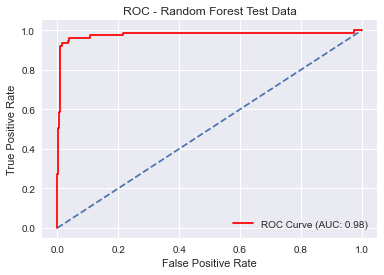

rfl_test_auc 0.9786130412061858


In [143]:
rfl_test_auc, rfl_test_fpr, rfl_test_tpr = draw_auc_roc(best_grid, X_test, y_test, 'red', 'ROC - Random Forest Test Data')
print('rfl_test_auc', rfl_test_auc)

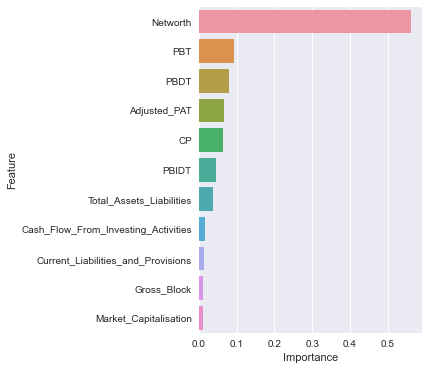

In [144]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : best_grid.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,6))
sns.barplot(y='Feature', x='Importance', data=feature_rank, orient = "h")

## Model 3: LDA

In [145]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(shrinkage='auto')
grid_values = {'solver': ['svd', 'lsqr', 'eigen'],
               'tol': [0.0001, 0.001]
              }
LDA_model = GridSearchCV(clf, param_grid = grid_values, cv = 10)
LDA_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(shrinkage='auto'),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001]})

In [146]:
LDA_model.best_params_

{'solver': 'lsqr', 'tol': 0.0001}

In [147]:
ytest_predict = LDA_model.predict(X_test)

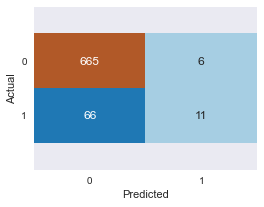

In [148]:
draw_cm(y_test,ytest_predict)

In [149]:
print(metrics.classification_report(y_test,ytest_predict,digits=3))

              precision    recall  f1-score   support

           0      0.910     0.991     0.949       671
           1      0.647     0.143     0.234        77

    accuracy                          0.904       748
   macro avg      0.778     0.567     0.591       748
weighted avg      0.883     0.904     0.875       748



In [150]:
conf_met=metrics.classification_report(y_test,ytest_predict,digits=3,output_dict=True)
met_df=pd.DataFrame(conf_met).transpose()
lda_test_prec=round(met_df.loc["1"][0],2)
lda_test_rec=round(met_df.loc["1"][1],2)
lda_test_f1=round(met_df.loc["1"][2],2)
lda_test_accu=round(met_df.loc["accuracy"][0],2)

In [151]:
met_df

,precision,recall,f1-score,support
0,0.909713,0.991058,0.948645,671.000000
1,0.647059,0.142857,0.234043,77.000000
accuracy,0.903743,0.903743,0.903743,0.903743
macro avg,0.778386,0.566958,0.591344,748.000000
weighted avg,0.882675,0.903743,0.875083,748.000000


In [152]:
print('lda_test_prec :', lda_test_prec)
print('lda_test_rec :', lda_test_rec)
print('lda_test_f1 :', lda_test_f1)
print('lda_test_accu :', lda_test_accu)

lda_test_prec : 0.65
lda_test_rec : 0.14
lda_test_f1 : 0.23
lda_test_accu : 0.9


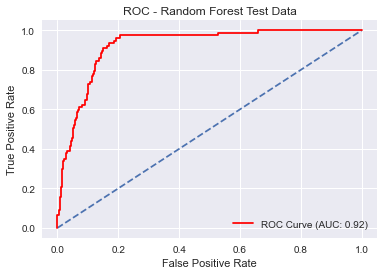

lda_test_auc 0.9214779259488649


In [157]:
lda_test_auc, lda_test_fpr, lda_test_tpr = draw_auc_roc(LDA_model, X_test, y_test, 'red', 'ROC - Random Forest Test Data')
print('lda_test_auc', lda_test_auc)

## Compare Models 

In [158]:
index=['Accuracy','AUC','Recall','Precision','F1 Score']
test_perf_data = pd.DataFrame({'Logit':[logit_test_accu,logit_test_auc,logit_test_rec,logit_test_prec,logit_test_f1],
                     'RF':[rfl_test_accu,rfl_test_auc,rfl_test_rec,rfl_test_prec,rfl_test_f1],
                     'LDA':[lda_test_accu,lda_test_auc,lda_test_rec,lda_test_prec,lda_test_f1]
                    },index=index)
round(test_perf_data,2)

,Logit,RF,LDA
Accuracy,0.97,0.97,0.90
AUC,0.98,0.98,0.92
Recall,0.96,0.73,0.14
Precision,0.76,0.92,0.65
F1 Score,0.85,0.81,0.23


Text(0.5, 1.0, 'Model Performance in Test Datasets')

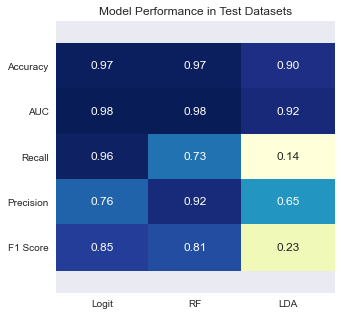

In [156]:
plt.subplots(figsize=(5,5))
ax = sns.heatmap(test_perf_data, cmap='YlGnBu', annot=True, fmt='.2f',annot_kws={"fontsize":12}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.title('Model Performance in Test Datasets')

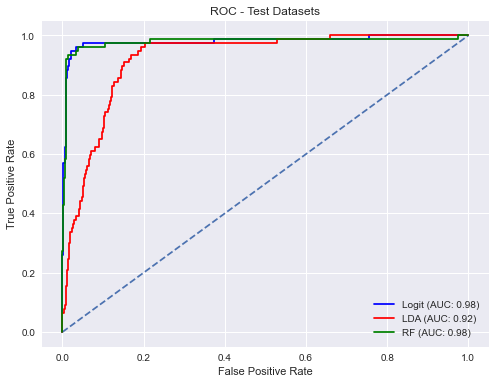

In [159]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_test_fpr, logit_test_tpr,color='blue',label='Logit (AUC: %0.2f)'%logit_test_auc)
plt.plot(lda_test_fpr,lda_test_tpr,color='red',label='LDA (AUC: %0.2f)'%lda_test_auc)
plt.plot(rfl_test_fpr,rfl_test_tpr,color='green',label='RF (AUC: %0.2f)'%rfl_test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test Datasets')
plt.legend(loc="lower right")

## END